# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Predicting *Insurance Cost* 

# Definition

## Project Overview

*The domain of my proposal data is related medical insurance and I choose this because if an insurance company wants to make money, it should collect the more money in year premiums than that it spends on medical treatment for a beneficiary so, insurers should invest more time to predict the annual cost of an individual and charge a little more than that , as it is a very time taking process to predict each individual cost manually, and as time is the most precious factor in today’s life, I am trying to develop a model that predicts estimated cost of an individual based on previous data.*

*And this problem is to be solved because every day number people who are applying for health are increasing, insurance providing companies need a model that makes one of their task easier.*

https://www.techemergence.com/machine-learning-at-insurance-companies/

https://cloud.google.com/blog/big-data/2017/03/using-machine-learning-for-insurance-pricing-optimization

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5134202/

## Importing All Required Functions

In [217]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns                                     # For Visualizations

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor as DTR

from sklearn import metrics 

import numpy as np

from sklearn import linear_model

from sklearn.ensemble import AdaBoostRegressor as ada

from time import time                                     # To measure Training and Testing Time 

from sklearn.metrics import r2_score

from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.metrics import make_scorer

## Problem Statement

**The problem statement is to predict the future medical expenses of individuals that help medical insurance to make decision on charging the premium and the medical expenses are difficult to estimate because many diseases are rare and random, but we can still predict the estimated that an individual needs in a annual year by observing some of the factors and help insurance company to make decision on charging the premium. And this can be done by applying past data as training data as past data is the data and it contains the exact cost of an Individual that an insurance company spend on them so, by looking and analysing the features (smoker or not, body mass index, region) of individual of certain cost we can easily predict the future cost of an individual who is nearly with same features.**

### Reading Data from CSV File into Pandas DataFrame 

In [218]:
file_name = 'insurance.csv'
data = pd.read_csv(file_name)

### Insights about the Data

In [219]:
# No. of Attributes and Instances  in the data

print(' Shape of the data :',data.shape)

# Names of Features

print('\nThe features present in the data are :\n\n',data.columns)

# Displaying First five Observations

display(data.head())

# Displaying last five Observations

display(data.tail())

 Shape of the data : (1338, 7)

The features present in the data are :

 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603



### Describing the Data

In [220]:
# Description of the data to get some insights

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the above code execution , we can clearly say that all ** some features are numerical and some are not numerical( Region, Smoker, Sex) **and bmi, charges and age features are continuous values and number of children is discrete in nature. There is ** no missing values ** in the data which can be clearly identified from the above execution.

In [221]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Plotting Histograms of some Parameters

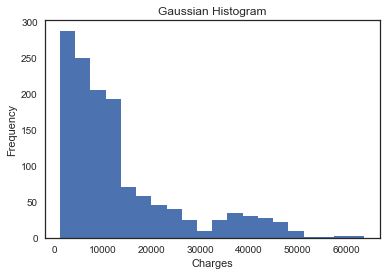

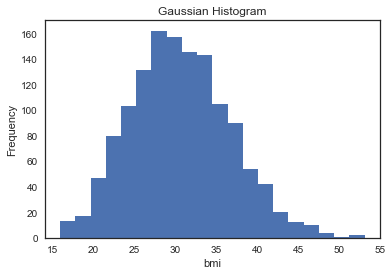

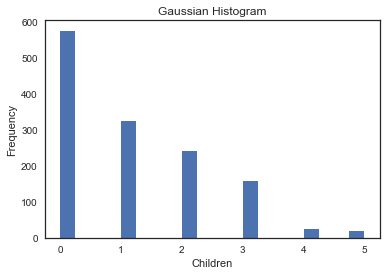

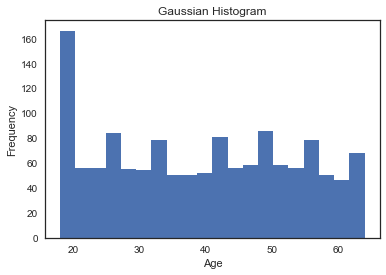

In [222]:
plt.hist(data.charges,20)
plt.title("Gaussian Histogram")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()
plt.hist(data.bmi,20)
plt.title("Gaussian Histogram")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()
plt.hist(data.children,20)
plt.title("Gaussian Histogram")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()
plt.hist(data.age,20)
plt.title("Gaussian Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

** from above histograms we can say charges feature is skewed and it is beacuse of some cases like a person with smoking habbit and with children more than 2, will have high cost so, charges feature is right Skewed.**

## Exploratory Visualization

Scatter Matrix 


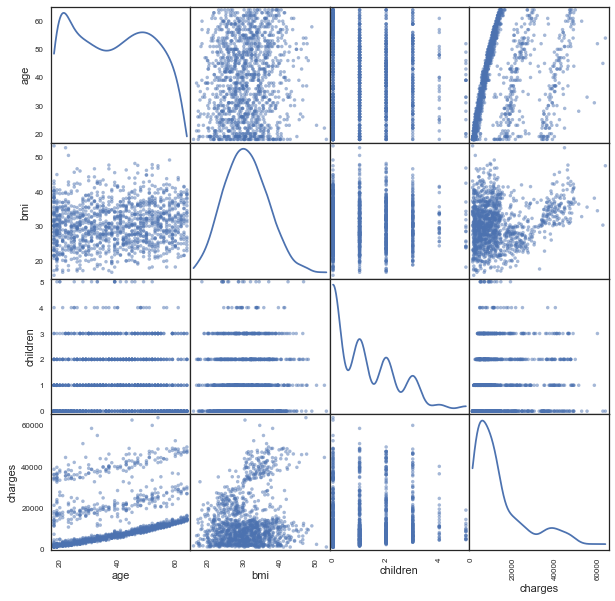

In [223]:
# plotting a scatter matrix to know the relationship ( correlation ) between the features
print('Scatter Matrix ')
pd.plotting.scatter_matrix( data, alpha = 0.5 , figsize = ( 10, 10 ) , diagonal = 'kde' );
plt.show()

**  From the above visualizations  , it is clear that no features are mostly corrrelated with each other so, all features plays impotant role in predicting the output.**

Correlation between the features


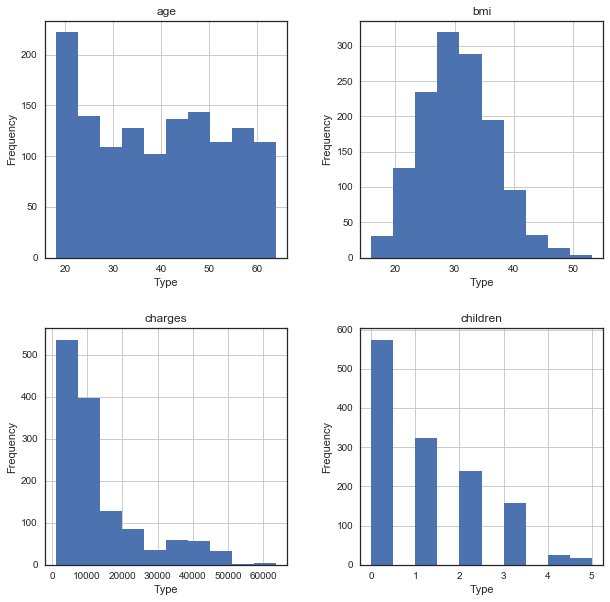

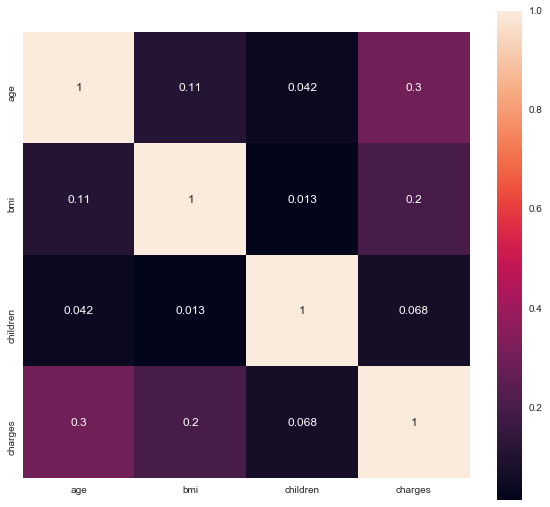

In [224]:
grap = data.hist(figsize=(10,10))

for ax in grap.flatten():
    ax.set_xlabel('Type')
    ax.set_ylabel('Frequency')

f , ax = plt.subplots(figsize = ( 10 , 9 )) 

sns.set( style = 'white' )
correlation = data.corr()

# Plotting a heatmap because it is easy to identify the correlation between features

sns.heatmap(correlation,annot=True,square=True)
print('Correlation between the features')
plt.show()

** From above heatmap it is clear that no features are mostly related to each other and charges features is right skewed for the reason mentioned above.**

## Converting categorical data into numbers

In [225]:
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)

data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [226]:
data['region'].dtype
data['region'] = pd.factorize(data['region'])[0]
data['region'].value_counts()

1    364
2    325
0    325
3    324
Name: region, dtype: int64

In [227]:
data.head()
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,2,10600.5483
1334,18,0,31.92,0,0,3,2205.9808
1335,18,0,36.85,0,0,1,1629.8335
1336,21,0,25.80,0,0,0,2007.9450
1337,61,0,29.07,0,1,2,29141.3603


### Describing Converted Data

In [228]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Missing Values Treatment

In [229]:
# Finding Null values in the data
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Outlier Treatment

In [230]:
# Identifying outliers in each attribute

for feature in data.keys():
    
    Q1 = np.percentile(data[feature], q=25)
    
    Q3 = np.percentile(data[feature], q=75)
    
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    print("Outliers for the feature '{}':".format(feature))
    display( data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))] )
    


Outliers for the feature 'age':


,age,sex,bmi,children,smoker,region,charges


Outliers for the feature 'sex':


,age,sex,bmi,children,smoker,region,charges


Outliers for the feature 'bmi':


,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,1,11381.32540
286,46,0,48.07,2,0,3,9432.92530
401,47,1,47.52,1,0,1,8083.91980
543,54,0,47.41,0,1,1,63770.42801
847,23,1,50.38,1,0,1,2438.05520
860,37,0,47.60,2,1,0,46113.51100
1047,22,1,52.58,1,1,1,44501.39820
1088,52,1,47.74,1,0,1,9748.91060
1317,18,1,53.13,0,0,1,1163.46270


Outliers for the feature 'children':


,age,sex,bmi,children,smoker,region,charges


Outliers for the feature 'smoker':


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
11,62,0,26.290,0,1,1,27808.72510
14,27,1,42.130,0,1,1,39611.75770
19,30,1,35.300,0,1,0,36837.46700
23,34,0,31.920,1,1,3,37701.87680
29,31,1,36.300,2,1,0,38711.00000
30,22,1,35.600,0,1,0,35585.57600
34,28,1,36.400,1,1,0,51194.55914
38,35,1,36.670,1,1,3,39774.27630
39,60,1,39.900,0,1,0,48173.36100


Outliers for the feature 'region':


,age,sex,bmi,children,smoker,region,charges


Outliers for the feature 'charges':


,age,sex,bmi,children,smoker,region,charges
14,27,1,42.130,0,1,1,39611.75770
19,30,1,35.300,0,1,0,36837.46700
23,34,0,31.920,1,1,3,37701.87680
29,31,1,36.300,2,1,0,38711.00000
30,22,1,35.600,0,1,0,35585.57600
34,28,1,36.400,1,1,0,51194.55914
38,35,1,36.670,1,1,3,39774.27630
39,60,1,39.900,0,1,0,48173.36100
49,36,1,35.200,1,1,1,38709.17600
53,36,1,34.430,0,1,1,37742.57570


** There are some outliers present in the data. But , I am not going to remove them because it contains important data like waht is the cost of a person who smokes and had 4 children, it is a rare case but happens if we remove outliers we will miss that data so, i'm not going to remove the outliers.**


In [231]:
X = data.drop('charges' , axis = 1)
y = data.charges
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
dtypes: float64(1), int64(5)
memory usage: 62.8 KB


### Splitting the total data into training and Testing data

In [232]:
# Dividing the taken data into training and testing set


X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 29 )

print(X_train.shape )
print(X_test.shape )

(1070, 6)
(268, 6)


### Function for Testing Different Algorithms

In [233]:
def performance(clf, X_train1, y_train1, X_test1, y_test1): 
    
    t1 = time()
    
    clf.fit(X_train1 , y_train1)     
    
    t2 = time()
    
    print('Training time :',t2 - t1) # printing the training time
    
    t1 = time()
    
    y_preds = clf.predict(X_test1)
    
    t2 = time()
    
    print('Testing time : ',t2 - t1)    # printing the Testing time
    
    print('r2_score is{:.2f}'.format(r2_score( y_test1 , y_preds)))
    
    print('\n')
    


## Algorithms and Techniques

#### Algorithms:

The problem discussed here is a regression task . So , I chossed four Algorithms. Then I compare the performance of each model and select the best one. The three algorithms that I chosen are:

##### 1. Linear Regression :
I choose linear regression model That finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variables. The adjective simple refers to the fact that the outcome variable is related to a single predictor. So ,i assumed it will find the linear relationship between output cost and remaing input features.


##### 2. Decision Tree Regressor :
The Second algorithm that I choose is Decision Tree regressor. The reason behind this is it is very powerful classification algorithm that converts our regression task into tree like structure and it is easy to interpret and understand.This algorithm is relatively easy and fast to predict value of our Target variable.The no. of hypertune parameters are almost null. The disadvantage of this algorithm is also overfitting which can be solved by Ensemble learning algorithms.

##### 3. Adaptive Boost Regressor :
The final algorithm that I choose is Adaptive Boosting regressor. It belongs to the family of Ensemble learners. It is one of the most powerful and efficient algorithm which boosts the performance of a model by combining a set of weak learners into a single strong learner. This algorithm is less prone to Over-Fitting because it will allocate  weights to set of weak learners which then contribute to strong learner.

##### 4.Random forest Regressor:
Random forest Regressor is an ensemble learning method regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set. So, i choosed this as my fourth algorithm.

#### Techniques :
The technique that I am going to use to improve the performance of model is Grid Search.

##### Grid Search : 
I am using Grid Search technique is to tune Hyper parameters because tuning Hyper parametersis very important part in improving performance of the model. Finding best Hyper parameters is a difficult task. So , we give a set of values to the parameters which are to be tuned and give this space to Grid Search algorithm . It will allocate each value in the space at a time and returns the best parameters.

## Implementation

### Performance of Benchmark model

In [234]:
model = linear_model.LinearRegression()

performance(model,X_train,y_train,X_test,y_test)

Training time : 0.0
Testing time :  0.0
r2_score is0.71




** From above we can say that , the r2- score of benchmark model is low ( around 71 % ). **

### Testing Different Algorithms

In [235]:
clf1 = DTR()
clf2 = ada()
clf3=RFR()
lis=[clf1,clf2,clf3]
for i in lis:
    print("Performance of "+str(i))
    print('\n')
    performance(i,X_train,y_train,X_test,y_test)

Performance of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


Training time : 0.020961761474609375
Testing time :  0.000997781753540039
r2_score is0.74


Performance of AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)


Training time : 0.03699898719787598
Testing time :  0.04393315315246582
r2_score is0.79


Performance of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, ran

**By using all three algorithms we got good r2_score( around 81%) for Random forest Regressor so i choose Random forest Regressor as my Final model and i try to optimise and increase the perfomance of our model.**

### Plots of Final Model Before Optimization

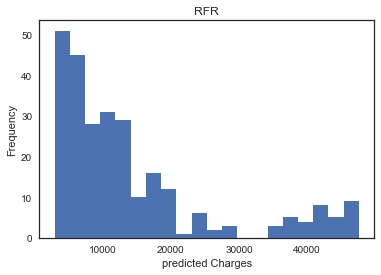

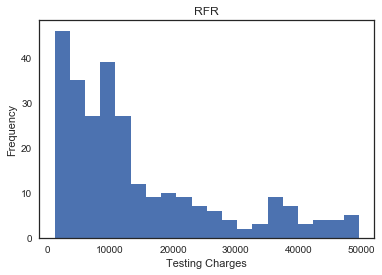

In [236]:
plt.hist(y_preds,20)
plt.title("RFR")
plt.xlabel("predicted Charges")
plt.ylabel("Frequency")
plt.show()
plt.hist(y_test,20)
plt.title("RFR")
plt.xlabel("Testing Charges")
plt.ylabel("Frequency")
plt.show()

### Function to Calculate r2_score

In [237]:
def per_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score =r2_score(y_true, y_predict)
    # Return the score
    return (score)

## Refinement

### Hyper Parameter Tuning using Grid Search

In [238]:
    regressor = RFR()
    scoring_fnc = make_scorer(per_metric)
    param_grid = {'n_estimators': [90,130],
                   'max_depth': [4,5],
                   'min_samples_leaf':[1,5],
                   'min_samples_split' :[3,5],                  
                }
    grid = GridSearchCV(estimator=regressor,param_grid=param_grid,scoring = scoring_fnc)
    grids = grid.fit(X_train, y_train)

    # Return the optimal model after fitting the data
    best=grids.best_estimator_
    print(grids.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


### Checking performance of the Optimized model

In [239]:
best.fit(X_train , y_train)     # Calculating the training time
y_preds = best.predict(X_test)
grid = GridSearchCV(estimator=regressor,param_grid=param_grid,scoring = scoring_fnc)
best=grids.best_estimator_    
print('r2_score is :{:.2f}'.format(r2_score(y_test, y_preds)))

r2_score is :0.84


** So, after optimising the Random forest Regressor algorithm the performance of the model is increased (r2_score changed from 81% to 84%) which is good.**

### Plots of Final Model After Optimization

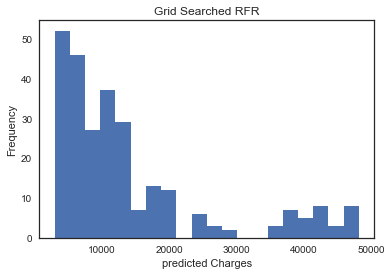

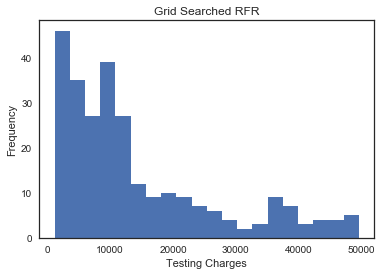

In [240]:
plt.hist(y_preds,20)
plt.title("Grid Searched RFR")
plt.xlabel("predicted Charges")
plt.ylabel("Frequency")
plt.show()

plt.hist(y_test,20)
plt.title("Grid Searched RFR")
plt.xlabel("Testing Charges")
plt.ylabel("Frequency")
plt.show()

There are some wrong predictions but, the model is predictig almost correct costs in many cases and we can improve performane of the model by training it more real world data. 

### Now i would like to predict some peoples insurane cost based on some input factors
- Age

- Sex{ male-> 1, Female ->0}

- Bmi

- Children

- Smoker { yes->1 , no ->0)

- Region {southeast -> 1
, northwest ->   2
 ,southwest  ->  0
 ,northeast  ->  3 }

In [241]:
def opfun(X_new):
    best.fit(X , y)
    y_new = best.predict(X_new)
    return y_new

In [242]:
X_new=[[30,1,28.9,2,0,2],[29,0,30.0,1,1,3],[30,0,28.9,2,1,2],[22,0,28.9,1,0,2]] # some random data
for i, price in enumerate(opfun(X_new)):
    print("Predicted Insurance cost of Client {} : ${:,.2f}".format(i+1, price))

Predicted Insurance cost of Client 1 : $6,533.35
Predicted Insurance cost of Client 2 : $23,080.66
Predicted Insurance cost of Client 3 : $19,769.89
Predicted Insurance cost of Client 4 : $4,256.21


## Reflection

- First , I downloaded the data from Kaggle and read the data using Pandas DataFrame.
- Then I defined my problem statement as to predict the insurance cost of an individual.
- Then I found the no. of instances and attributes present in the data at the Data exploration step.
- Then I performed Bi-variate analysis to see whether the features are correlated or not. Almost no features are corrlated.
- At the Data Pre-processing step , I tried to find missing values but there were no missing values. Then I tried to find out Outliers in the data and I  not removed outliers in the data.
- Then I defined a Benchmark model which will predict the insurance cost but it gave me bad performance as expected.
- So , I choose three algorithms Decision Tree and Ada Boost Classifier and RandomForestRegressor out of which I choose RandomForestRegressor with proper reasoning.
- I tried to improve the performance of RandomForestRegressor with Grid Search technique ( Hyper parameter optimization) and r2_score was improved.
- Overall , I had a great experience with the project.

## Improvement

- if the data is more and contains more features like Drinker or not and food habbits( Good or bad) we can improve the performance of the model.